In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [32]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
len(X_train)

60000

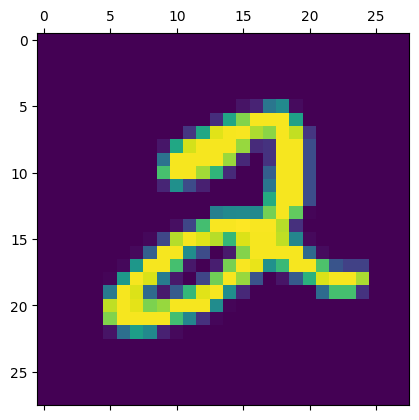

In [34]:
plt.matshow(X_train[5])

In [35]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [36]:
X_train= X_train/255
X_test= X_test/255

In [37]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [38]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
#original array size is 60000,28,28
#flattening it by passing the length parameter for a 1D array and the var
X_train_flattened.shape

(60000, 784)

In [39]:
X_test_flattened= X_test.reshape(len(X_test),28*28)

In [40]:
#Dense means all neurons in a layer are connected to neurons in a second layer
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
# 10 -> output neurons
# 784 -> input neurons
# function name sigmoid as a parameter
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 615us/step - accuracy: 0.8107 - loss: 0.7288
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.9126 - loss: 0.3121
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.9174 - loss: 0.2938
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.9245 - loss: 0.2741
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.9241 - loss: 0.2715


In [42]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.9149 - loss: 0.3008


[0.26494693756103516, 0.9251000285148621]

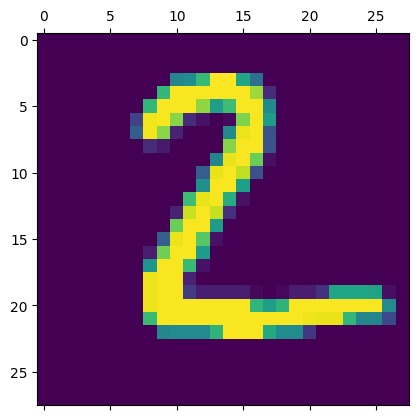

In [48]:
plt.matshow(X_test[1])

In [46]:
y_predicted= model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


array([3.1849745e-01, 6.6448473e-03, 9.9949419e-01, 3.2779557e-01,
       6.0329391e-10, 8.2371080e-01, 8.7753636e-01, 1.1397223e-12,
       1.5607744e-01, 2.3939326e-09], dtype=float32)

In [47]:
np.argmax(y_predicted[1])

2

In [49]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [50]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,    9,  925,   15,    8,    4,   12,   12,   37,    4],
       [   2,    1,   19,  920,    0,   24,    2,   12,   22,    8],
       [   2,    2,    4,    1,  908,    0,    9,    4,    9,   43],
       [   9,    3,    3,   35,   11,  773,   14,    6,   31,    7],
       [  12,    3,    7,    1,    8,   12,  910,    2,    3,    0],
       [   1,    8,   21,    7,    7,    0,    0,  946,    1,   37],
       [   7,   11,    7,   23,    9,   23,    8,   12,  864,   10],
       [  11,    7,    1,   10,   20,    6,    0,   23,    5,  926]])>

Text(95.72222222222221, 0.5, 'Truth')

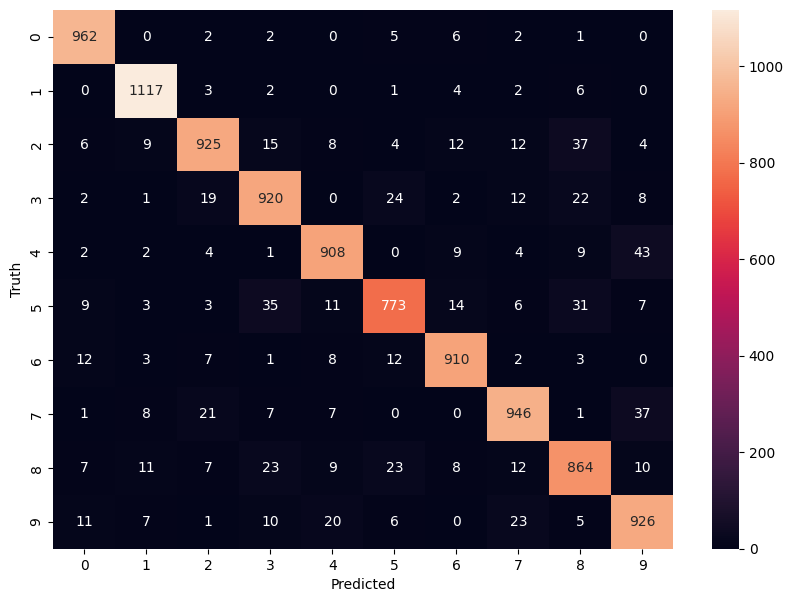

In [52]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)


C:\Users\narve\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8749 - loss: 0.4431
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9616 - loss: 0.1321
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9738 - loss: 0.0868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9801 - loss: 0.0659
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9852 - loss: 0.0489


In [54]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.9743 - loss: 0.0939


[0.08134648948907852, 0.9769999980926514]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step


Text(95.72222222222221, 0.5, 'Truth')

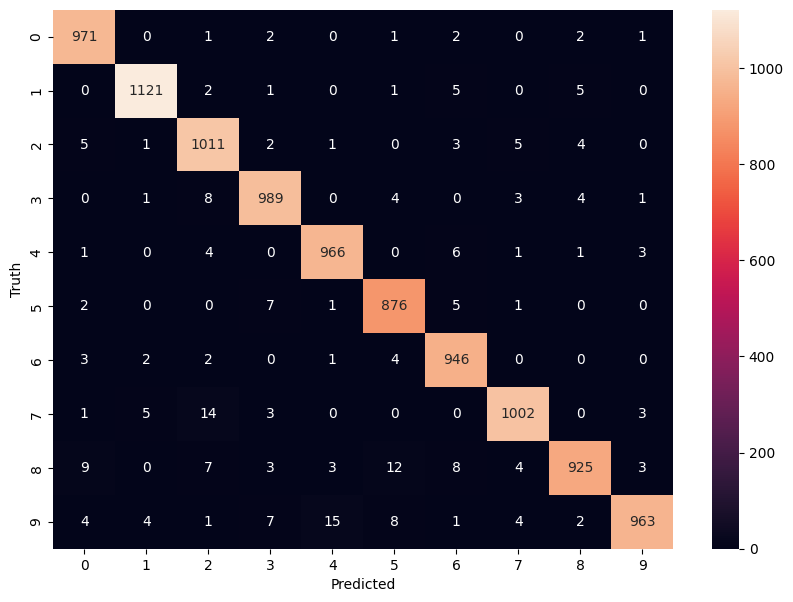

In [57]:
y_predicted= model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)


C:\Users\narve\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\narve\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8696 - loss: 0.4646
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9608 - loss: 0.1319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9739 - loss: 0.0883
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9811 - loss: 0.0626
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9858 - loss: 0.0471
